<a href="https://colab.research.google.com/github/Leonhard-Hopeful/ML-Algorithms/blob/main/logistic_regression_tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#import linraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

import pandas as pd  # Import pandas for data handling
from sklearn.model_selection import train_test_split # Import train_test_split for splitting data
from sklearn.preprocessing import StandardScaler # Import StandardScaler for feature scaling

In [6]:
#2. Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
data = pd.read_csv(url, header=None)

# View the first few rows
print(data.head())

   0    1   2   3    4     5      6   7  8
0  6  148  72  35    0  33.6  0.627  50  1
1  1   85  66  29    0  26.6  0.351  31  0
2  8  183  64   0    0  23.3  0.672  32  1
3  1   89  66  23   94  28.1  0.167  21  0
4  0  137  40  35  168  43.1  2.288  33  1


In [7]:
#give labels to its columns
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
# Split into features (X) and labels (y)
X = data.drop('Outcome', axis=1)  # 'Outcome' is the target
y = data['Outcome']

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#buid the model
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])

In [14]:
#compile the model
model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])


In [15]:
history = model.fit(
                 X_train,
                 y_train,
                 epochs=100,
                 batch_size=32,
                 validation_split=0.2,
                 verbose=1
                 )

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5934 - loss: 0.7600 - val_accuracy: 0.5528 - val_loss: 0.7184
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5408 - loss: 0.7908 - val_accuracy: 0.5610 - val_loss: 0.7090
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5544 - loss: 0.7721 - val_accuracy: 0.5772 - val_loss: 0.6997
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5878 - loss: 0.7503 - val_accuracy: 0.5935 - val_loss: 0.6913
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5931 - loss: 0.7218 - val_accuracy: 0.6098 - val_loss: 0.6832
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5762 - loss: 0.7310 - val_accuracy: 0.6260 - val_loss: 0.6749
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6107 - loss: 0.7282 - val_accuracy: 0.6423 - val_loss: 0.6675
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6413 - loss: 0.6825 - val_accuracy: 0.6423 - 

In [16]:
# Evaluate on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", accuracy)


Test Accuracy: 0.7402597665786743


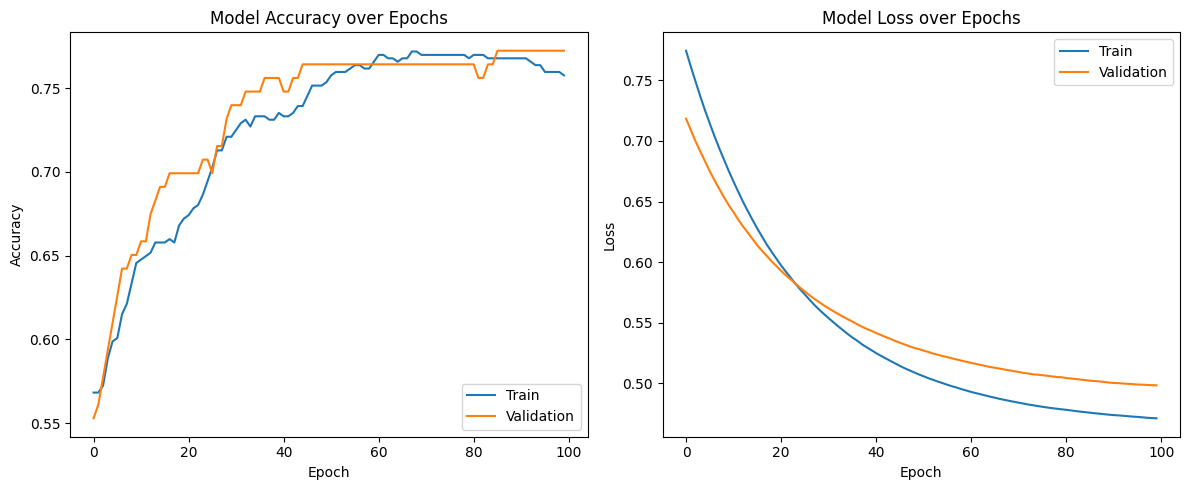

In [19]:
#Visualize training history
# Plot training & validation accuracy values
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()